# EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle


## Recopilación de datos

In [2]:
df = pd.read_csv("C:/Users/Simón/sayons-intro-ml-new/data/raw/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Análisis descriptivo 

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.shape

(48895, 16)

### Interesante hacer agrupaciones por barrio y propietario, aunque observamos que hay demasiados valores lo que imposibilita un buen análisis

In [5]:
df['host_name'].value_counts(), df['neighbourhood'].value_counts()

(host_name
 Michael          417
 David            403
 Sonder (NYC)     327
 John             294
 Alex             279
                 ... 
 Pujan              1
 Raheem             1
 Rusaa              1
 Erin At Bedly      1
 Brad & Rachel      1
 Name: count, Length: 11452, dtype: int64,
 neighbourhood
 Williamsburg          3920
 Bedford-Stuyvesant    3714
 Harlem                2658
 Bushwick              2465
 Upper West Side       1971
                       ... 
 Richmondtown             1
 Fort Wadsworth           1
 New Dorp                 1
 Rossville                1
 Willowbrook              1
 Name: count, Length: 221, dtype: int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
df['host_id'].value_counts(), df['host_name'].value_counts()

(host_id
 219517861    327
 107434423    232
 30283594     121
 137358866    103
 16098958      96
             ... 
 274040642      1
 274035866      1
 24680832       1
 71142174       1
 274025920      1
 Name: count, Length: 37457, dtype: int64,
 host_name
 Michael          417
 David            403
 Sonder (NYC)     327
 John             294
 Alex             279
                 ... 
 Pujan              1
 Raheem             1
 Rusaa              1
 Erin At Bedly      1
 Brad & Rachel      1
 Name: count, Length: 11452, dtype: int64)

In [10]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [ ]:
df.loc[df['calculated_host_listings_count'].idxmax()] #Busco el propietario con mayor número de inmuebles
df.loc[df['host_name'] == 'Sonder (NYC)'] # Resulta ser una inmobiliaria que tiene una gran cantidad de propiedades

## Limpieza de datos

### Eliminar duplicados:

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [12]:
df.drop('host_id', axis=1).duplicated().sum(), df.drop('host_name', axis=1).duplicated().sum()

(np.int64(0), np.int64(0))

### Nos aseguramos que no existen duplicados en todo el dataset

In [13]:
if df.duplicated().sum():
    df = df.drop_duplicates()
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### No hay filas duplicadas

### Valores nulos o faltantes:

In [14]:
df.isnull().sum().sort_values(ascending=False) / len(df)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### Existe un porcentaje considerable de valores nulos en 'last_review'  y 'reviews_per_month'

### Limpieza de datos: Eliminar información irrelevante
    
Decido eliminar variables redundantes y que no aportan información destacada, en este caso: 'id','host_id', 'name', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood'

In [15]:
df.drop(['id','host_id', 'name', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood' ], axis = 1, inplace = True)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [16]:
df.isnull().sum().sort_values(ascending=False) / len(df)

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


## Análisis de variables:

### Variables univariante: variables categóricas

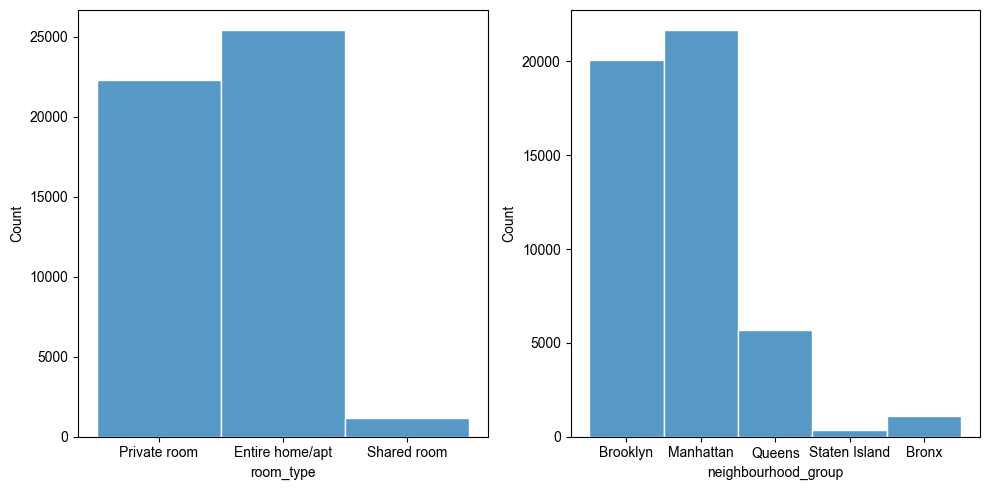

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
sns.set_style("whitegrid")
sns.histplot(ax=axis[0], data=df, x="room_type")
sns.histplot(ax=axis[1], data=df, x="neighbourhood_group")
plt.tight_layout()
plt.show()

### Observamos que hay más viviendas de tipo 'Entire home' y que la mayoría se encuentran en Brooklyn y Manhattan

### Variables univariante: variables númericas

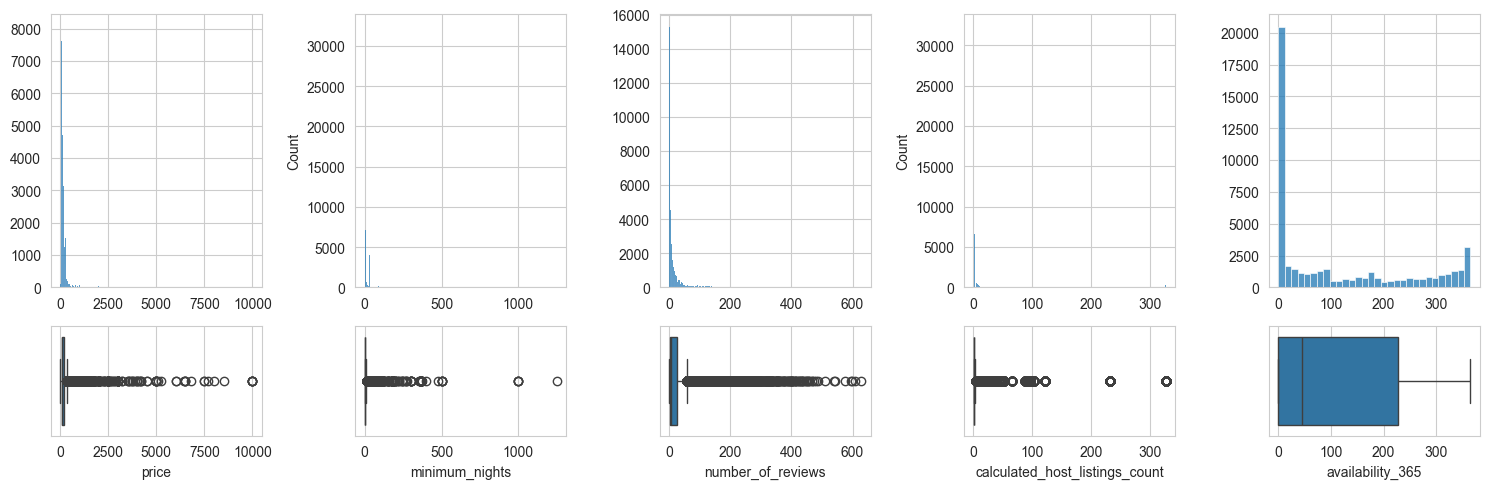

In [19]:
fig, axis = plt.subplots(2, 5, figsize=(15, 5), gridspec_kw={'height_ratios': [5, 2]})
sns.set_style("whitegrid")
sns.histplot(ax=axis[0, 0], data=df, x="price").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="price")
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights").set(xlabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights")
sns.histplot(ax=axis[0, 2], data=df, x="number_of_reviews").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="number_of_reviews")
sns.histplot(ax=axis[0, 3], data=df, x="calculated_host_listings_count").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=df, x="calculated_host_listings_count")
sns.histplot(ax=axis[0, 4], data=df, x="availability_365").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 4], data=df, x="availability_365")


plt.tight_layout()
plt.show()

> #### Observaciones:
>
> - La combinación de los dos gráficos nos permite conocer las distribuciones y sus características estadísticas.
> - De la visualización resultante podemos tener claro las variables que cuentan con valores atípicos.
> - Las distribuciones tienen asimetría, sesgada hacia la izquierda
> - Sería interesante analizar la variable price, a considerar como target

### Análisis de Variables Multivariante: procedemos a buscar todas las posibles relaciones que existen entre las variables

### Codificación de variables categóricas para el estudio de correlaciones, análisis númerico-categórico

In [20]:
df["room_type_n"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]

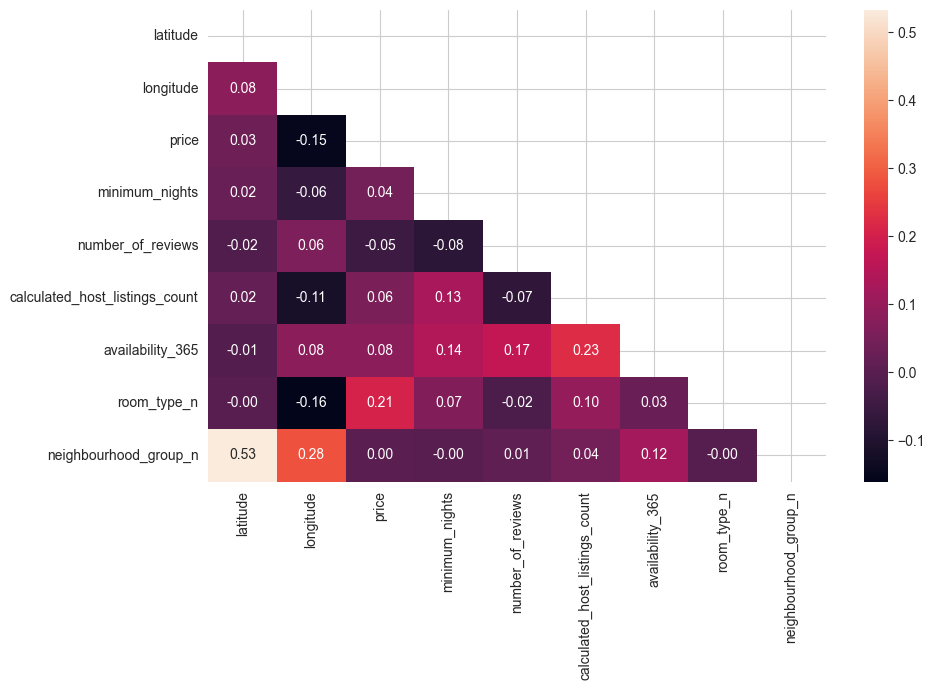

In [21]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'room_type_n', 'neighbourhood_group_n']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

### Observaciones:
>- El precio se relaciona directamente con el tipo de vivienda
>- Existe una correlación indirecta entre la zona y el precio: hay relación entre el precio y las coordenadas geográficas que a su vez se relacionan con la zona (como era de esperar),
   podemos deducir que el precio está relacionado con la zona
>- El mínimo de noches se relacion con la cantidad de propietarios, puede ser objeto de estudio

### Análisis de variables multivariante: númerico-númerico

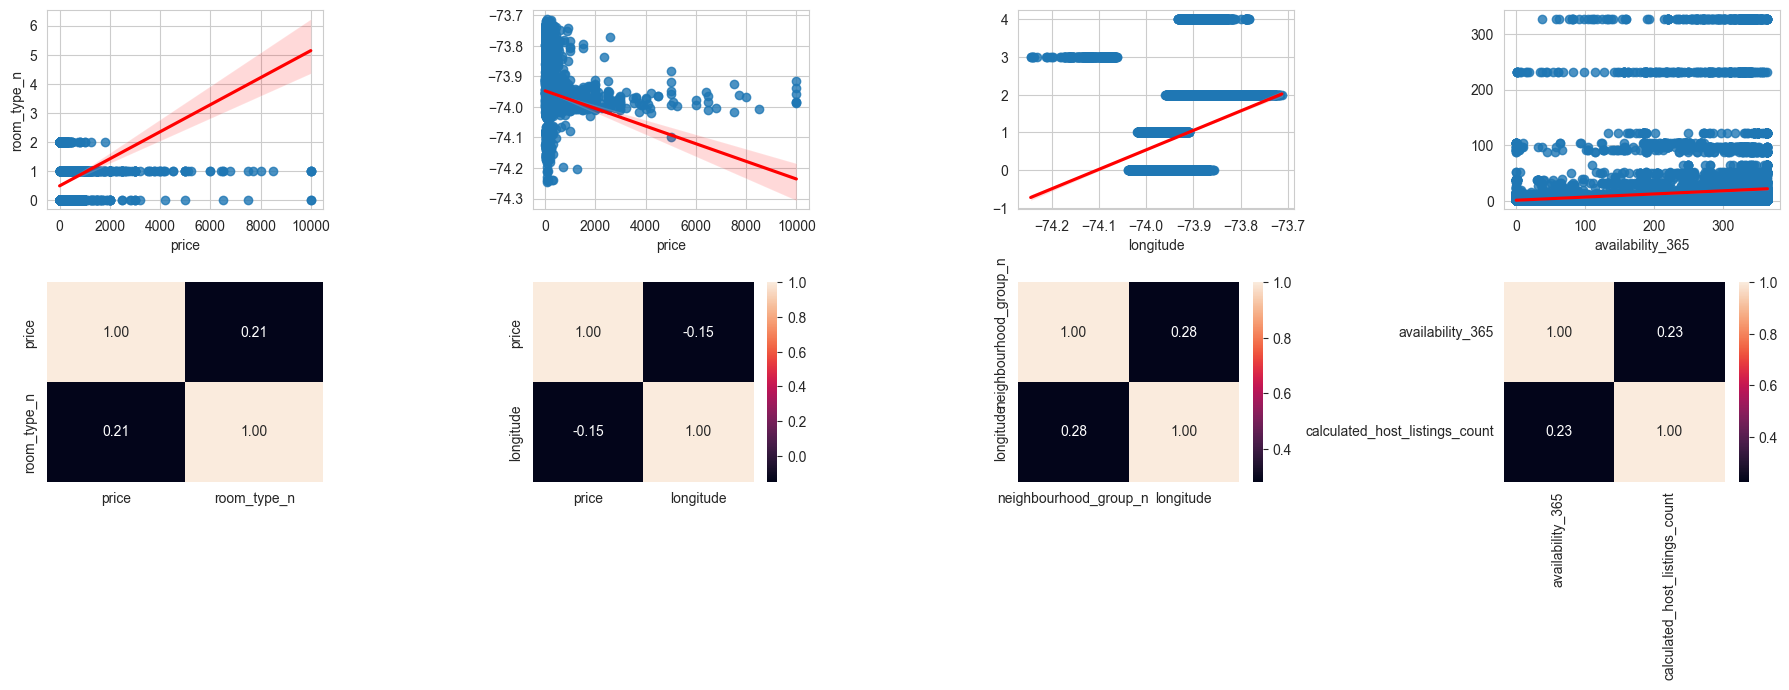

In [ ]:
corr_room_price = df[["price", "room_type_n"]].corr()
corr_longitude_price = df[["price", "longitude"]].corr()
corr_longitude_neighbourhood = df[["neighbourhood_group_n", "longitude"]].corr()
corr_availability_host = df[["availability_365", "calculated_host_listings_count"]].corr()

fig, axis = plt.subplots(2, 4, figsize=(18, 7))
sns.set_style("whitegrid")

sns.regplot(ax=axis[0, 0], data=df, x="price", y="room_type_n", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1, 0], data=corr_room_price, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="price", y="longitude", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_longitude_price, annot=True, fmt=".2f")

sns.regplot(ax=axis[0, 2], data=df, x="longitude", y="neighbourhood_group_n", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 2], data=corr_longitude_neighbourhood, annot=True, fmt=".2f")

sns.regplot(ax=axis[0, 3], data=df, x="availability_365", y="calculated_host_listings_count", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 3], data=corr_availability_host, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

### Observaciones:
1. Hay mayor cantidad de viviendas tipo 1(entire home) y también son las que alcanzan un precio más elevado, seguidas por las tipo 0(private room) y luego las tipo 2 (shared room).
2. Hay viviendas más caras en una franja de longitud, por debajo de los 1000$ se distribuyen por toda la ciudad.
3. El último gráfico no aporta mucha información, esxisten 2 propietarios con un gran número de viviendas, seguramente inmobiliarias, con disponibilidad muy variada.

### Análisis de variables multivariante: categórico-categórico

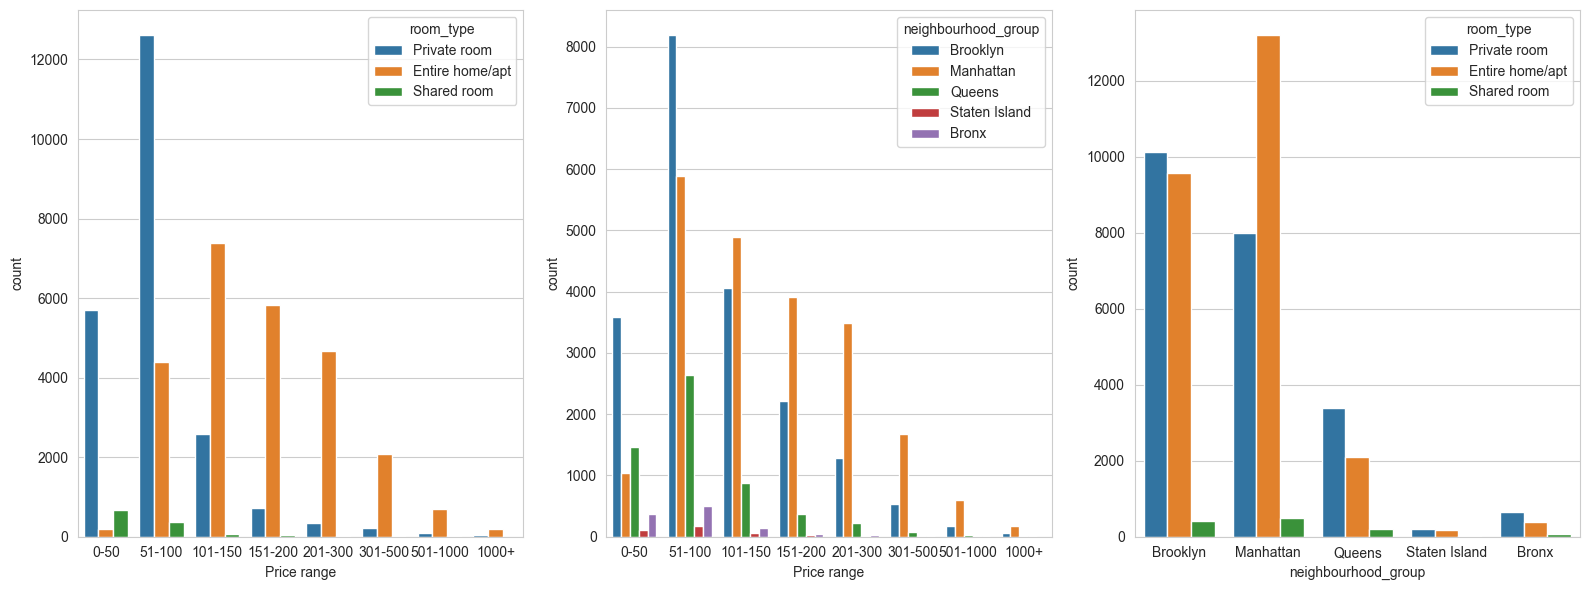

In [67]:
fig, axis = plt.subplots(1, 3, figsize=(16, 6))
bins = [0, 50, 100, 150, 200, 300, 500, 1000, df["price"].max()]
labels = ["0-50", "51-100", "101-150", "151-200", "201-300", "301-500", "501-1000", "1000+"]
df["price_range"] = pd.cut(df["price"], bins=bins, labels=labels, include_lowest=True)
sns.set_style("whitegrid")
sns.countplot(ax=axis[0], data=df, x="price_range", hue="room_type").set_xlabel('Price range')
sns.countplot(ax=axis[1], data=df, x="price_range", hue="neighbourhood_group").set_xlabel('Price range')
sns.countplot(ax=axis[2], data=df, x="neighbourhood_group", hue="room_type")
plt.tight_layout()
plt.show()

### Observaciones: 
>- Ajustando el precio en rangos podemos relacionarlo con el tipo de vivienda y la zona, confirmando lo anterior
>- La mayoría de viviendas se reparten entre Brooklyn y Manhattan, así como las viviendas de mayor precio
>- Existen más viviendas de tipo 'entire home' y 'private room' que 'shared room'

## Ingeniería de características

### Análisis de outliers

#### Análisis descriptivo

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000
room_type_n,48895.0,0.567113,0.541249,0.00000,0.00000,1.00000,1.000000,2.00000
neighbourhood_group_n,48895.0,0.786911,0.844386,0.00000,0.00000,1.00000,1.000000,4.00000


#### Visualización

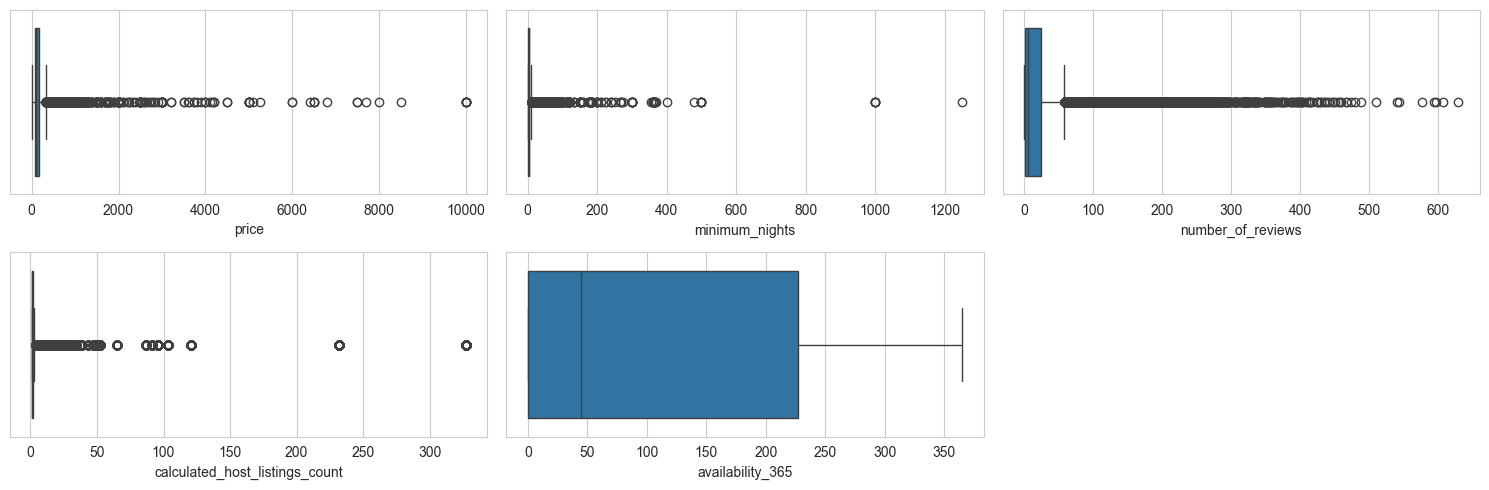

In [32]:
fig, axis = plt.subplots(2, 3, figsize=(15, 5))
sns.set_style("whitegrid")
sns.boxplot(ax=axis[0, 0], data=df, x="price")
sns.boxplot(ax=axis[0, 1], data=df, x="minimum_nights")
sns.boxplot(ax=axis[0, 2], data=df, x="number_of_reviews")
sns.boxplot(ax=axis[1, 0], data=df, x="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 1], data=df, x="availability_365")
fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

### Variables con valores atípicos

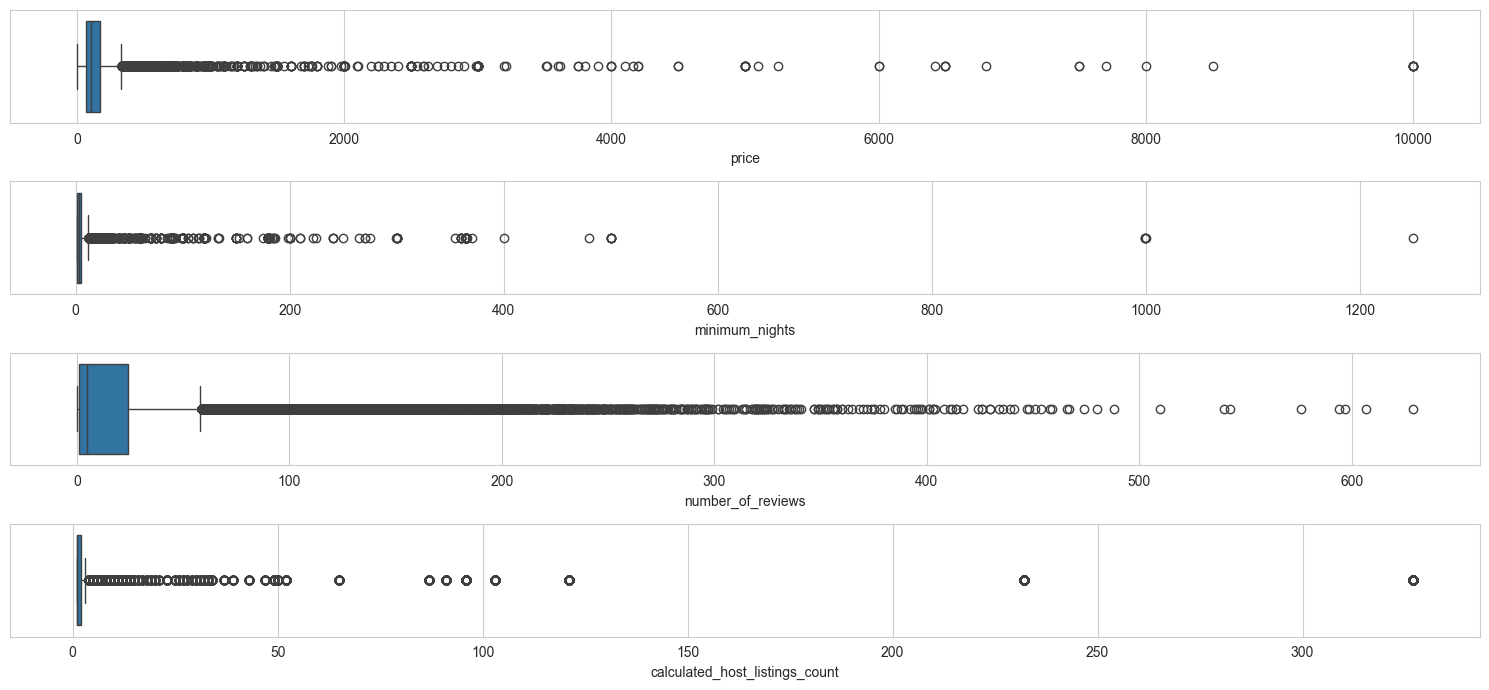

In [36]:
fig, axis = plt.subplots(4, 1, figsize=(15, 7))
sns.set_style("whitegrid")
sns.boxplot(ax=axis[0], data=df, x="price")
sns.boxplot(ax=axis[1], data=df, x="minimum_nights")
sns.boxplot(ax=axis[2], data=df, x="number_of_reviews")
sns.boxplot(ax=axis[3], data=df, x="calculated_host_listings_count")
plt.tight_layout()
plt.show()

#### Valores atípicos 'price'

In [37]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#### Calculo del Rango inter cuartil: IQR = Q3(75%) - Q1(25%)

In [74]:

q1_price = df["price"].quantile(0.25)
q3_price = df["price"].quantile(0.75)
iqr_price = q3_price - q1_price

# Definir los límites inferior y superior
lower_limit_price = 0 if (q1_price - 1.5 * iqr_price) < 0 else q1_price - 1.5 * iqr_price
upper_limit_price = q3_price + 1.5 * iqr_price

f"Límite superior: {round(upper_limit_price, 2)}, Límite inferior: {round(lower_limit_price, 2)}, Rango intercuartílico: {round(iqr_price, 2)}"

'Límite superior: 334.0, Límite inferior: 0, Rango intercuartílico: 106.0'

In [72]:
df[df['price'] > 334]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,price_range
61,Manhattan,40.74623,-73.99530,Entire home/apt,375,180,5,1,180,1,1,301-500
85,Brooklyn,40.69723,-73.99268,Entire home/apt,800,1,25,1,7,1,0,501-1000
103,Manhattan,40.73096,-74.00319,Entire home/apt,500,4,46,2,243,1,1,301-500
114,Manhattan,40.72540,-73.98157,Entire home/apt,350,2,7,4,298,1,1,301-500
121,Brooklyn,40.66499,-73.97925,Entire home/apt,400,2,16,2,216,1,0,301-500
...,...,...,...,...,...,...,...,...,...,...,...,...
48758,Queens,40.75508,-73.93258,Entire home/apt,350,2,0,1,364,1,2,301-500
48833,Manhattan,40.70605,-74.01042,Entire home/apt,475,2,0,1,64,1,1,301-500
48839,Brooklyn,40.59866,-73.95661,Private room,800,1,0,1,23,0,0,501-1000
48842,Manhattan,40.75204,-74.00292,Entire home/apt,350,1,0,1,9,1,1,301-500


#### Existen 2990 valores atípicos para la variable precio, pero si tenemos en cuenta que la mayoría de viviendas son apartamentos, tiene sentido pensar que su precio varie por las características que puedan tener, dato del que no disponemos, por lo tanto decido mantener estos valores

#### Valores atípicos 'minimum_nights'

In [76]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

#### Calculo del Rango inter cuartil: IQR = Q3(75%) - Q1(25%)

In [77]:
q1_nights = df['minimum_nights'].quantile(0.25)
q3_nights = df['minimum_nights'].quantile(0.75)
iqr_nights = q3_nights - q1_nights

# Definir los límites inferior y superior
lower_limit_nights = 0 if (q1_nights - 1.5 * iqr_nights) < 0 else q1_nights - 1.5 * iqr_nights
upper_limit_nights = q3_nights + 1.5 * iqr_nights

f"Límite superior: {round(upper_limit_nights, 2)}, Límite inferior: {round(lower_limit_nights, 2)}, Rango intercuartílico: {round(iqr_nights, 2)}"

'Límite superior: 11.0, Límite inferior: 0, Rango intercuartílico: 4.0'

In [78]:
df[df['minimum_nights']>11]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,price_range
6,Brooklyn,40.68688,-73.95596,Private room,60,45,49,1,0,0,0,51-100
14,Manhattan,40.73530,-74.00525,Entire home/apt,120,90,27,1,0,1,1,101-150
29,Manhattan,40.72920,-73.98542,Entire home/apt,180,14,29,1,67,1,1,151-200
36,Brooklyn,40.68876,-73.94312,Private room,35,60,0,1,365,0,0,0-50
45,Brooklyn,40.65944,-73.96238,Entire home/apt,150,29,11,1,95,1,0,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...
48810,Manhattan,40.79952,-73.96003,Private room,75,30,0,1,90,0,1,51-100
48843,Brooklyn,40.69635,-73.93743,Private room,45,29,0,2,341,0,0,0-50
48871,Manhattan,40.82233,-73.94687,Private room,35,29,0,2,31,0,1,0-50
48879,Brooklyn,40.71728,-73.94394,Entire home/apt,120,20,0,1,22,1,0,101-150


### Existen más de 6600 valores atípicos. Investigando un poco en internet, el mínimo de noches estandar es de 30 días, aunque podemos observar viviendas que alquilan por temporadas largas, 3-6 meses, incluso un año. Considero que valores por encima de un año deberían ser eliminados ya que seguramente se trate de algún error y carece de sentido.

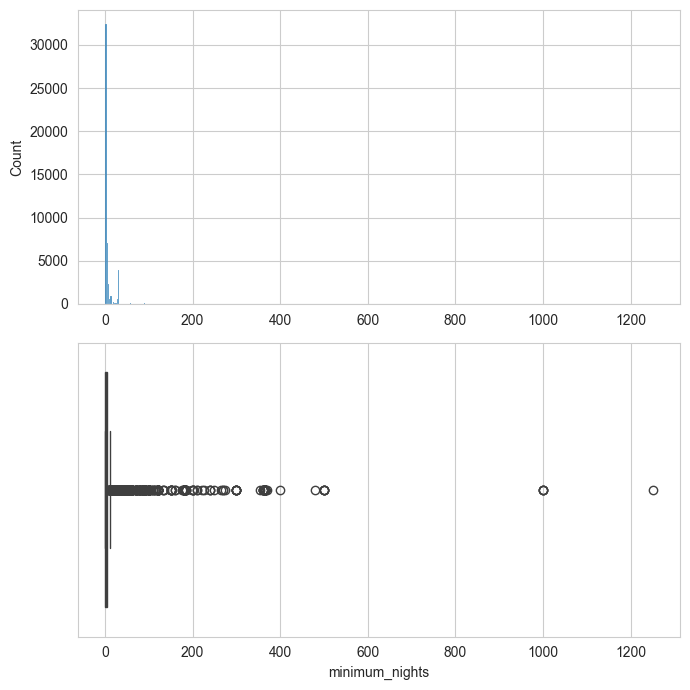

In [83]:
fig, axis = plt.subplots(2, 1, figsize=(7, 7))
sns.set_style("whitegrid")

sns.histplot(ax=axis[0], data=df, x="minimum_nights").set(xlabel=None)
sns.boxplot(ax=axis[1], data=df, x="minimum_nights")



plt.tight_layout()
plt.show()

In [85]:
median_nights = df[df['minimum_nights'] <= 365]['minimum_nights'].median()
df.loc[df['minimum_nights'] > 365, 'minimum_nights'] = median_nights
df['minimum_nights'].describe()

count    48895.000000
mean         6.839329
std         16.449789
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        365.000000
Name: minimum_nights, dtype: float64

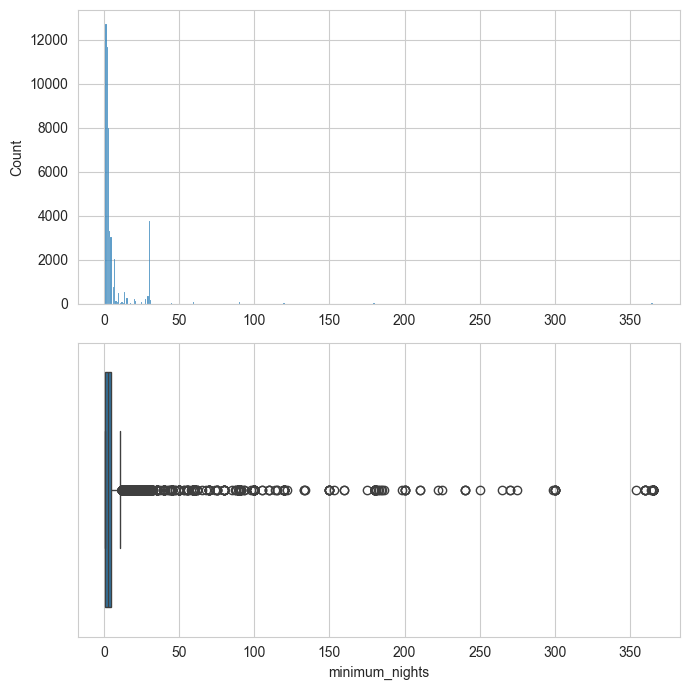

In [86]:
fig, axis = plt.subplots(2, 1, figsize=(7, 7))
sns.set_style("whitegrid")

sns.histplot(ax=axis[0], data=df, x="minimum_nights").set(xlabel=None)
sns.boxplot(ax=axis[1], data=df, x="minimum_nights")



plt.tight_layout()
plt.show()

### Aunque siguen existiendo valores atípicos estos siguen una tendencia más adaptada a la realidad, por lo que estos sí los mantenemos

#### Valores atípicos 'calculated_host_listings_count'

In [89]:
df['calculated_host_listings_count'].describe().T

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

#### Calculo del Rango inter cuartil: IQR = Q3(75%) - Q1(25%)

In [91]:
q1_host = df['calculated_host_listings_count'].quantile(0.25)
q3_host = df['calculated_host_listings_count'].quantile(0.75)
iqr_host = q3_host - q1_host

# Definir los límites inferior y superior
lower_limit_host = 0 if (q1_host - 1.5 * iqr_host) < 0 else q1_host - 1.5 * iqr_host
upper_limit_host = q3_host + 1.5 * iqr_host

f"Límite superior: {round(upper_limit_host, 2)}, Límite inferior: {round(lower_limit_host, 2)}, Rango intercuartílico: {round(iqr_host, 2)}"

'Límite superior: 3.5, Límite inferior: 0, Rango intercuartílico: 1.0'

In [92]:
df.loc[df['calculated_host_listings_count']>3.5]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,price_range
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,101-150
9,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,4,188,1,1,101-150
21,Brooklyn,40.68069,-73.97706,Private room,130,2,130,6,347,0,0,101-150
22,Brooklyn,40.67989,-73.97798,Private room,80,1,39,6,364,0,0,51-100
23,Brooklyn,40.68001,-73.97865,Private room,110,2,71,6,304,0,0,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...
48858,Queens,40.74387,-73.82556,Private room,68,3,0,4,362,0,2,51-100
48867,Brooklyn,40.59080,-73.97116,Shared room,25,1,0,6,338,2,0,0-50
48868,Brooklyn,40.59118,-73.97119,Shared room,25,7,0,6,365,2,0,0-50
48878,Queens,40.74477,-73.87727,Private room,45,1,0,5,172,0,2,0-50


In [ ]:
df.loc[df['calculated_host_listings_count'].idxmax()] #Busco el propietario con mayor número de inmuebles
df.loc[df['host_name'] == 'Sonder (NYC)'] # Resulta ser una inmobiliaria que tiene una gran cantidad de propiedades